## What is OpenCV?

OpenCV or Open Source Computer Vision Library is an open source computer vision and machine learning library that supports a couple of progamming languages namely: Python, Java, C and C++. It is BSD-licensed, so it is easy to use by business everywhere.

**Content:**
1. Reading an Image

1. Fixing the Image

1. Drawing Shapes
    1. Drawing a Line
    1. Drawing a Rectangle
    1. Drawing a Circle
    1. Drawing a Ellipse
    1. Drawing a Polygon
    1. Putting the Text on the Image
1. Saving the Image



## 1. Reading the Image



Here is the sample image that we are going to use for this tutorial, which is labeled `apple.jpeg`.




<img src="apple.jpeg" style="float:left">


    

In [16]:
# Importing Dependencies

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

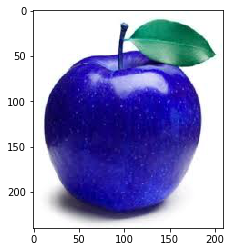

In [17]:
image_path = "apple.jpeg"
img = cv.imread(image_path)               #Read the image and store it into a variable
plt.imshow(img)                             #Ploting the image using matplotlib



Notice how the apple looks weird? 

This is because OpenCV utilize the BGR format as it was the popular format for camera manufacturer back in the day when it was written, and for historical reasons we have to live with it. Before we fix this in a second, let us first examine the `cv.imread()` function.

`cv.imread()` has two arguments:

1. Image Path
2. The 3 parameters that the image should be read. They can also be altneratively represented as integers:
    
    <b>-1</b><br>
    `cv.IMREAD_COLOR` (<b>Default Tag</b>) - neglects the image transparency, mostly for 8-bit images that don’t have the alpha channel.
    
    <b>0</b><br>`cv.IMREAD_GRAYSCALE` — responsible for loading our images in grayscale.
    
    <b>1</b><br>`cv.IMREAD_UNCHANGED` — loads an image using alpha channel.
    
Ok, now that we understand the image reading function, let's try to fix the weird colors. To do this, we are going to Convert it to RGB format using the `cvtColor()` function in OpenCV, using the `cv.COLOR_BGR2RGB` as the parameter.
    
    



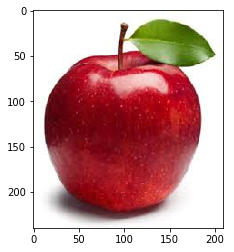

In [18]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Boom! 

There we go! We just successfully displayed our first image. Alternatively, you can also displayed the Image using the below method.

In [ ]:
cv.imshow("image",img_rgb)
key = cv.waitKey(0)

if key == 27:
    cv.destroyAllWindows()

## 2. Examine the Image


<Br>Let's now close examine the img that we just manipulated.

In [20]:
print("Image type: ", type(img_rgb))
print("Image data type: ", img_rgb.dtype)
print("Image shape: ", img_rgb.shape)

Image type:  <class 'numpy.ndarray'>
Image data type:  uint8
Image shape:  (240, 210, 3)


As we can see the image is a numpy n-th dimensional array with its shape in this case being `(240,210,3)`. This is because computers read images in term of pixels. Note that OpenCV stores the y pixels as rows, and x pixels as columns. So in this case image, this is a `240 x 210` picture. The `3` represent the BGR or RGB value inside of each pixel, expressed in form of an array. 

With a dtype of `uint8`(8-bit unsigned integer arrays, the max value is `255`, and the min value is `0`. In image processing, bicubic interpolation is often chosen over bilinear or nearest-neighbor interpolation in image resampling, when speed is not an issue.

# 3. Drawing Shapes



### a. Drawing a Line


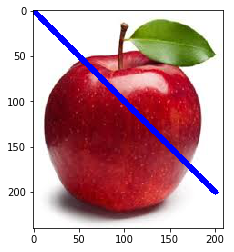

In [21]:
line_img = img_rgb.copy()                           #Make a copy of the image
cv.line(line_img,(0,0),(200,200),(0,0,255),5)       #Drawing a diagonal blue line with thickness of 5 px
plt.imshow(line_img)                                #show the image

There are 4 arguments in this tutorial for the cv.line function that you have to worry about, which will mutate the image variable. For more parameters, feel free to refer to the drawing documentation 
https://docs.opencv.org/3.4.1/d6/d6e/group__imgproc__draw.html


1. `img_rgb` , which in this case represents the image we would like to draw our line on
2. `(0,0)`, the starting location of our line with both `x` and `y` equals 0
3. `(200,200)`, the end location of our line also with both `x` and `y` equals 200
4. `((0,255,0),5)`, the color of our line `(0,255,0)` and the thickness of the line in `5` px


### b. Drawing a rectangle



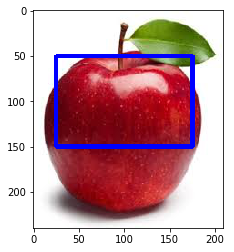

In [22]:
rectangle_img = img_rgb.copy()
cv.rectangle(rectangle_img,(25,50),(175,150),(0,0,255),3)
plt.imshow(rectangle_img)

For the cv.rectangle method, here are the parameters meant. 

1. `img_rgb`, the image we would like to draw our rectangle on
2. `(25,50)`, pt1, vertex of the rectangle
3. `(175,150)`, pt2, vertext of the rectangle of the pt1
4. `(0,0,255)`, the RGB value of our rectangle color
5. `3` the thickness of our rectangle in pixels


### c. Drawing a circle



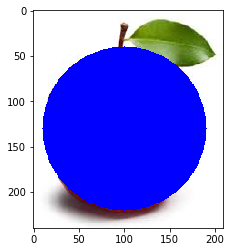

In [13]:
circle_img = img_rgb.copy()
cv.circle(circle_img,(100,130), 90, (0,0,255), -1)
plt.imshow(circle_img)

1. `img_rgb`, the image we would like to draw our rectangle on
2.  `(100,130)`, center location of where the circle starts
3. `90`, the radius of the cricle in pixels 
4. `(0,0,255)`, the RGB value of our rectangle color, in this case it is blue
5. `-1` thickness of our circle, if NEGATIVE, then the circle is going to be filled


### d. Drawing a Ellipse


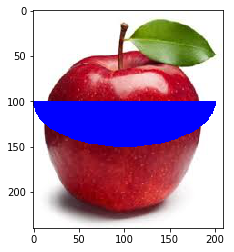

In [12]:
ellipse_img = img_rgb.copy()
cv.ellipse(ellipse_img,(100,100),(100,50),0,0,180,(0,0,255),-1)
plt.imshow(ellipse_img)

1. `img_rgb`, the image we would like to draw our ellipse on
2. `(100,100)`, center of our Ellipse
3. `(100,50)`, axes lengths (major axis length, minor axis length)
4. `0,0,180` , represents the ellipse rotation angle 0 , start angle 0, and end angel 180 
5. `(0,0,255)` represents the color of our ellipse, which is blue in this case
6.  `-1` the thickness of our rectangle in pixels, again, -1 meant that the ellipse will be filled instead of displaying a silhouette with x amount of pixels

### e. Drawing a Polygon



In [ ]:
polygon_img = img_rgb.copy()
pts = np.array([[70,85],[100,150],[160,150],[120,90]], np.int32)      #Drawing our Polygon
pts = pts.reshape((-1,1,2))                               #Reshaping our Polygon so it is
cv.polylines(polygon_img,[pts],True,(0,0,255),3)
plt.imshow(polygon_img)

cv.polylines also have 4 params in this tutorial.

In the beginning, we have to first give the 4 coordinates that we would like for the points of our array to be. Then, we shape those points into an array of shape ROWSx1x2 where ROWS are number of vertices.

1. `polygon_img`, the image that we would to manipulate on.
2. `[pts]`, the coordinates of the 4 vertices that we draw on the picture
3. `True`, boolean value that indicates whether the shape is enclosed or not. if closed, the funciton draws from the last vertex to the first.
4. `(0,0,255)`, the color of the polygon, which in this case is blue.
5. `3`, thickness of the polygon in px

### f. Putting Text on Image

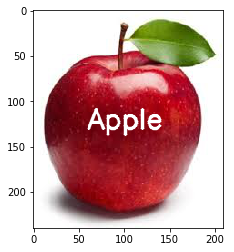

In [25]:
text_img = img_rgb.copy()
font = cv.FONT_HERSHEY_SIMPLEX #Setting the Font
textcolor = (255,255,255)
cv.putText(text_img,'Apple',(60,130), font, 1,textcolor,2,cv.LINE_AA)
plt.imshow(text_img)


Here are the functions for the cv.putText parameter:

1. `text_img`, the image where we are going to do our image manipulation on
2. `'Apple'`, the text string that you would like to put onto the image
3. `(60,130)`, the bottom-left corner of the text
4. `font`, in this case we set it as FONT_HERSHEY_SIMPLEX, to see more font options, check out https://docs.opencv.org/3.4.1/d0/de1/group__core.html#ga0f9314ea6e35f99bb23f29567fc16e11
5. `1`, the font scale, in this case is 1
6. `(255,255,255)`, the color of the text in rgb value
7. `2`,thickness of the text
8. `cv.LINE_AA`, line types, check it out here https://docs.opencv.org/3.4.1/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777

# 4. Saving the Image
Finally you save the Image using the cv.imwrite function. We can simpy demonstrate by saving the apple image with the text.



In [26]:
cv.imwrite("Apple_with_Text.jpg",text_img)

True